# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [16]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [3]:
trait_values_dict = {}

trait_values_dict["1.2.1"] = ["herb", "shrub", "tree"]
# trait_values_dict["1.3.1"] = ["obligatory", "terrestrial"]
# trait_values_dict["1.4.1"] = ["obligatory", "self-supporting"]
# trait_values_dict["2.1.1"] = ["annual", "perennial"]
trait_values_dict["2.3.1"] = ["phanerophyte", "chamaephyte", "hemicryptophyte", "cryptophyte", "therophyte"]

In [4]:
focus_names = ["Growth Form", "Life Form"]
focus_codes = ["1.2.1", "2.3.1"]
df_names = ["POWO", "WIKI"]

In [5]:
def show_values_on_bars(axs, size=14):
    def _show_on_single_plot(ax, size=size):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = max(p.get_y() + p.get_height() - 0.15, 0.1)
            value = '{:.2f}'.format(p.get_height())
            # print(_y, p.get_facecolor())
            blue_col = p.get_facecolor()[2]
            green_col = p.get_facecolor()[1]
#             if(p.get_height()<0.2):
#                 continue
            if(green_col>0.5):# or green_col<0.4):
                ax.text(_x, _y, value, ha="center", size=size) 
            else:
                ax.text(_x, _y, value, ha="center", size=size, color="white")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Result Data

In [6]:
results_dict = {}

## Regex

In [7]:
df_results_regex = pd.read_excel("Results//Regex_Simple_Results.xlsx") 

## Logistic Regression

In [8]:
df_results_lr = pd.read_excel("Results//LR_Bow_Results.xlsx")

## Encoders

In [9]:
df_results_Encoders_GF = pd.read_excel("Results//CategoricalTraitClassification_Encoder_Results_Growth_Form.xlsx")
df_results_Encoders_LF = pd.read_excel("Results//CategoricalTraitClassification_Encoder_Results_Life_Form.xlsx")

## Group Results

In [10]:
df_results_full = pd.concat([df_results_regex, df_results_lr, df_results_Encoders_GF, df_results_Encoders_LF])
df_results_full = df_results_full[df_results_full["Trait"]==df_results_full["Trait Value"]].reset_index().drop("index", axis = 1)

In [62]:
df_results_full.to_excel("Results/CategoricalTraitClassification_Full_Results.xlsx", index = False)

In [12]:
average_rows = []
for dataset in ["POWO", "WIKI"]:
    for model in ["Regex", "Logistic Regression", "EcoBERT", "DistilBERT", "DeBERTa_v3", "ELECTRA"]:
        metric_averages = []
        print(dataset, model)
        for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
            avg = 0
            for trait in ["Growth Form", "Life Form"]:
                df_subset = df_results_full[(df_results_full["Train Dataset"]==dataset)*
                                            (df_results_full["Test Dataset"]==dataset)*
                                            (df_results_full["Model"]==model)*
                                            (df_results_full["Trait Value"]==trait)]
                
                avg += df_subset[metric].values[0]/2
            metric_averages.append(avg)
        average_rows.append([dataset, dataset, "Average", "Average"] + metric_averages + [model, model])

POWO Regex
POWO Logistic Regression
POWO EcoBERT
POWO DistilBERT
POWO DeBERTa_v3
POWO ELECTRA
WIKI Regex
WIKI Logistic Regression
WIKI EcoBERT
WIKI DistilBERT
WIKI DeBERTa_v3
WIKI ELECTRA


In [13]:
df_results_full = pd.concat([df_results_full, pd.DataFrame(average_rows, columns = df_results_full.columns)])

In [14]:
df_results_full

,Train Dataset,Test Dataset,Trait,Trait Value,Accuracy,Precision,Recall,F1-Score,Model,Representation
0,POWO,POWO,Growth Form,Growth Form,0.775733,0.767079,0.527988,0.605319,Regex,Regex
1,WIKI,WIKI,Growth Form,Growth Form,0.782933,0.866438,0.480783,0.591509,Regex,Regex
2,POWO,POWO,Life Form,Life Form,0.800000,0.000000,0.000000,0.000000,Regex,Regex
3,WIKI,WIKI,Life Form,Life Form,0.800320,0.400000,0.003254,0.006443,Regex,Regex
4,POWO,POWO,Growth Form,Growth Form,0.884000,0.795085,0.790811,0.792755,Logistic Regression,Bag of Words
5,POWO,POWO,Life Form,Life Form,0.866400,0.828133,0.812781,0.819388,Logistic Regression,Bag of Words
6,WIKI,WIKI,Growth Form,Growth Form,0.819200,0.788381,0.796776,0.792183,Logistic Regression,Bag of Words
7,WIKI,WIKI,Life Form,Life Form,0.735200,0.623951,0.615575,0.619211,Logistic Regression,Bag of Words
8,POWO,POWO,Growth Form,Growth Form,0.924000,0.877930,0.854835,0.863794,EcoBERT,Embedding
9,WIKI,WIKI,Growth Form,Growth Form,0.908000,0.897531,0.889496,0.893306,EcoBERT,Embedding


# Model Comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_80080\3326921664.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


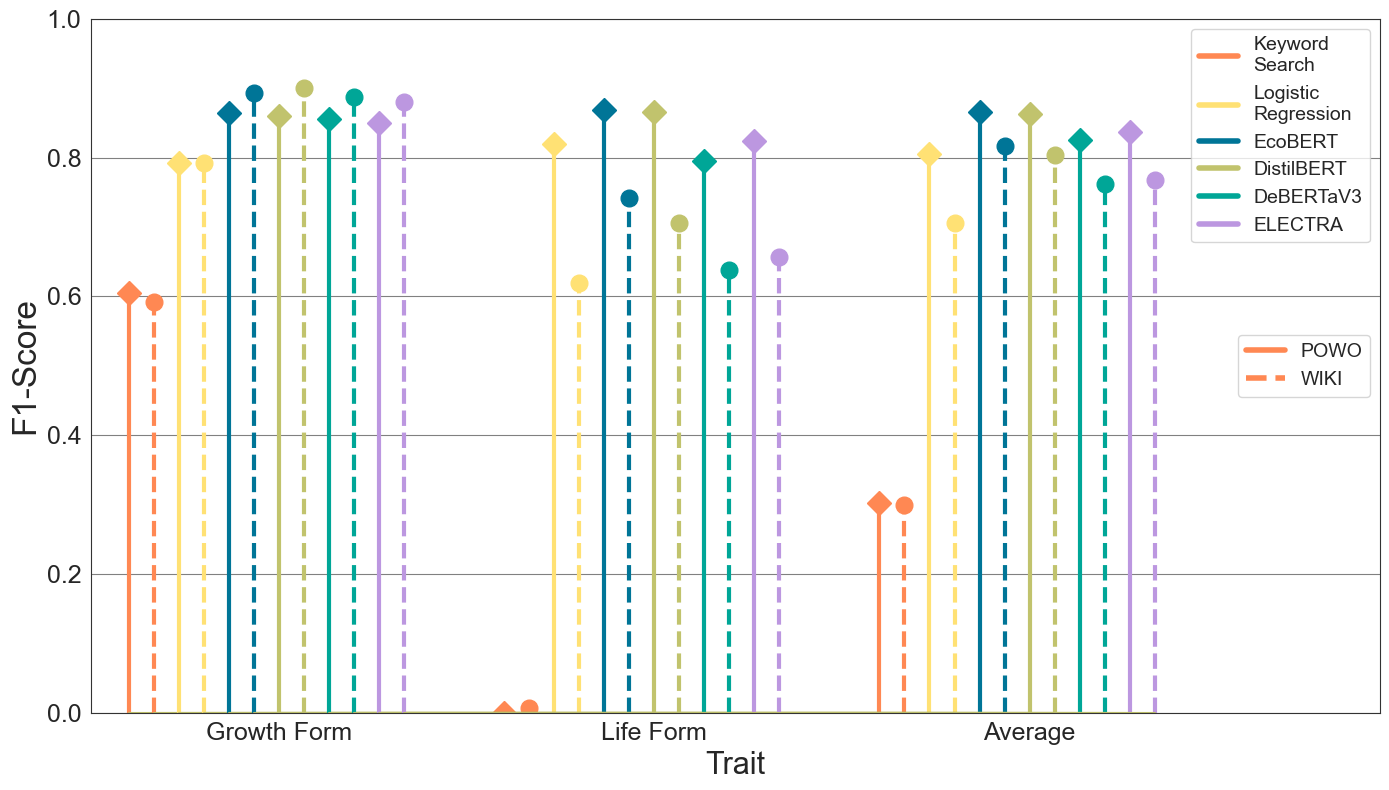

In [24]:
for i, metric in enumerate(["F1-Score"]):

    fig, axes  = plt.subplots(figsize=(14,8), nrows = 1)
    start = 0
    for j, model in enumerate(["Regex", "Logistic Regression", "EcoBERT", "DistilBERT", "DeBERTa_v3", "ELECTRA"]):
        for k, dataset in enumerate(["POWO", "WIKI"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Train Dataset"]==dataset)*(df_results_full["Test Dataset"]==dataset)*df_results_full["Trait Value"].apply(lambda x: x in focus_names + ["Average"])]
            if(dataset=="POWO"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(dataset=="WIKI"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes.set_xticks(np.arange(6, 45, 15))
    axes.set_xticklabels(["Growth Form", "Life Form", "Average"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Trait", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    if(i==0):
        traits = [mlines.Line2D([], [], color=color_palette[i], marker='', ls='-', linewidth = 4, label=focus_name) for i, focus_name in enumerate(["Keyword\nSearch", "Logistic\nRegression", "EcoBERT", "DistilBERT", "DeBERTaV3", "ELECTRA"])]
        datasets = [mlines.Line2D([], [], color=color_palette[0], marker='', ls='-', markersize = 10, linewidth = 4, label="POWO"), mlines.Line2D([], [], color=color_palette[0], marker='', ls='--', markersize = 10, linewidth = 4, label="WIKI")]
        legend1 = plt.legend(handles = datasets, fontsize = 14, loc = "center right")
        plt.legend(handles=traits, fontsize = 14, loc = "upper right")
        plt.gca().add_artist(legend1)
        # plt.legend()

    plt.xlim(-1.5, 50)
    # plt.legend()
    plt.tight_layout()
    plt.show()